In [1]:
import numpy as np
import pandas as pd 

In [2]:
df= pd.read_csv('df-filteredfinalN.csv')


dfM= df[['Day','State ID','Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Density Rank 2020 Census','SexRatio']]

X= dfM.values

Y= df['Confirmed'].values

Y1=df['Deaths'].values

Y2=df['Recovered'].values



In [3]:
dfM.describe()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Density Rank 2020 Census,SexRatio
count,1003.000000,1.003000e+03,1.003000e+03,1.003000e+03,1.003000e+03,1003.000000,1.003000e+03,1.003000e+03,1.003000e+03,1.003000e+03,1.003000e+03
mean,0.000000,-3.896296e-17,7.084175e-18,1.948148e-17,6.198653e-18,0.000000,1.416835e-17,1.593939e-17,-2.833670e-17,-2.944360e-17,-6.840656e-17
std,1.000499,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00
min,-1.687697,-1.832496e+00,-1.992045e+00,-2.147728e+00,-9.992958e-01,-2.637932,-1.241691e+00,-2.209422e+00,-1.874305e+00,-2.166090e+00,-1.440936e+00
25%,-0.873758,-7.020318e-01,-9.014731e-01,-9.348427e-01,-8.015706e-01,-0.647754,-8.743223e-01,-5.947375e-01,-5.669503e-01,-7.627999e-01,-6.643329e-01
50%,0.056458,4.508332e-03,-6.194377e-02,3.803197e-02,-4.360727e-01,0.170040,-3.411554e-01,-1.347131e-01,2.167905e-02,4.963096e-02,1.122707e-01
75%,0.870396,7.817024e-01,9.802433e-01,8.285013e-01,5.443740e-01,0.685306,7.699113e-01,2.997445e-01,7.332420e-01,8.620619e-01,5.005725e-01
max,1.684335,1.700205e+00,1.859258e+00,1.665308e+00,3.491370e+00,2.456483,2.312047e+00,2.436978e+00,3.050324e+00,1.526778e+00,2.442081e+00


       Table 1. Corrected database after removing outliers and normalization 

The following code is used to perform PCA(Principal Component Analysis), and LDA(Linear Discriminant Analysis) on a normalized dataset known as 'df-filteredfinalN.csv' to find features that could be used to form a new hybrid dataset for the upcoming tasks in the assignment.

#  1. PCA:

In [4]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
 scaled_data= preprocessing.scale(dfM.T)

In [6]:
pca= PCA(10)
pca.fit(dfM)
pca_data= pca.transform(dfM)

For performing the PCA Method, the required algrithms including the PCA from sklearn.decomposition, preprocessing from the sklearn, and plt from  matplotlib.pyplotwere were imported. The normalized dataset 'dFM' was scaled, fitted into the pca system and was trasnformed to getthe final output 'pca_data'(1).   

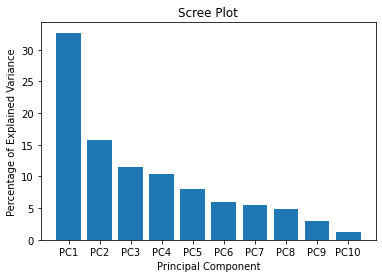

In [7]:
per_var=np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels=['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

    Figure 1. Percentage of Explained Variance for PCA Eig.Vectors(1)

The Cumulative variance represented by the PCA Eigenvectors is shown in the Scree Plot which is present in Figure 1. From the observation of the distribution of the Variance for each PCA eigenvector, PCA1 to PCA8 represents more than approximately 80% of the distrbution of variance from the original data. Thus, we chose the values from PCA1 to PCA8 to represent out new hybrid dataset as it represents most of the data while having reduced features. 

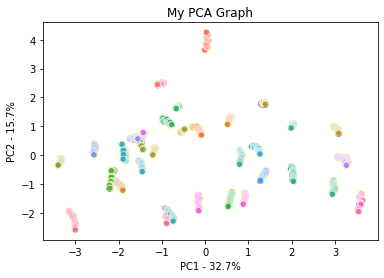

In [8]:
 
plt.scatter(pca_data[:,0], pca_data[:,1],c=Y+2,cmap='plasma')
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

sns.scatterplot(x= pca_data[:,0], y=pca_data[:,1],hue= df['State'])
plt.legend([],[], frameon=False)

plt.show()

              Figure 2. PC1 versus PC2 Result(2)

The data points for the first and second PCA eigenvectors have been plotted as shown in figure 2 where a hue was formed to represent the 'State' feature for each data point using the seaborn scatterplot function 'sns.scatterplot'(2).

<AxesSubplot:>

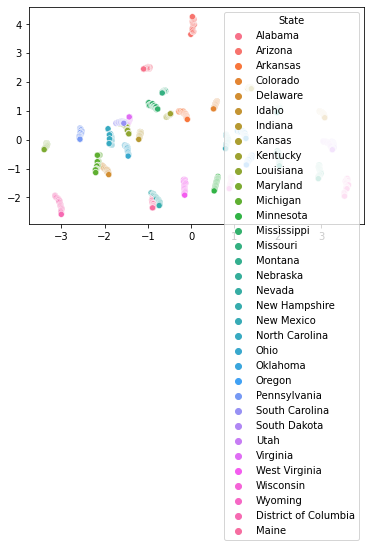

In [9]:
sns.scatterplot(x= pca_data[:,0], y=pca_data[:,1],hue= df['State'])

Figure 3. Presenting Color Coding Hue for Each State in the PCA Diagram(2) 

In [10]:
dfHybrid= pd.DataFrame(pca_data[:,0:8],columns= ['PC' + str(x) for x in range(1,9)])
dfHybrid['Confirmed']=Y
dfHybrid['Deaths']=Y1
dfHybrid['Recovered']=Y2

dfHybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC1        1003 non-null   float64
 1   PC2        1003 non-null   float64
 2   PC3        1003 non-null   float64
 3   PC4        1003 non-null   float64
 4   PC5        1003 non-null   float64
 5   PC6        1003 non-null   float64
 6   PC7        1003 non-null   float64
 7   PC8        1003 non-null   float64
 8   Confirmed  1003 non-null   bool   
 9   Deaths     1003 non-null   bool   
 10  Recovered  1003 non-null   bool   
dtypes: bool(3), float64(8)
memory usage: 65.8 KB


In [11]:
dfHybrid.to_csv('PCAFeatures.csv', index=False)

As mentioned previously,  PCA1 to PCA8 are used to represent our new hybrid dataset as it represents most of the data while having reduced features. The new hybrid dataset is known as 'PCAFeatures.csv'and will used for the upcoming questions in the assignment.

# 2. LDA:

For peforming the LDA, the LinearDiscriminantAnalysis from the sklearn.discriminant_analysis toolkit, and the plt from matplotlib.pyplotwere were imported. The features in the dataset were reduced based on each target label in the dataset('Confirmed','Deaths','Recovered')(3) to one feature. The final LDA models were fitted and were shown in a scatterplot based on their respective target labels(3).

In [12]:
lda=LinearDiscriminantAnalysis(n_components=1)

ldaD= lda.fit(X,Y).transform(X)

In [13]:
X #Original Features Array

array([[-1.68769725, -1.83249591, -1.71119919, ..., -1.55809484,
        -0.09808375, -1.44093648],
       [-1.68769725, -1.69118789, -1.36607727, ..., -1.50547993,
         0.34506038,  0.5005725 ],
       [-1.68769725, -1.62053388, -1.06293426, ..., -0.36660925,
         0.41891774, -0.66433288],
       ...,
       [ 1.68433531,  1.55889653, -0.20196313, ...,  1.19020927,
         0.04963096,  0.11227071],
       [ 1.68433531,  1.62955054,  1.21052829, ...,  1.09353377,
        -0.24579846,  0.5005725 ],
       [ 1.68433531,  1.70020455,  0.84073734, ...,  1.23550995,
         1.52677806,  2.44208148]])

In [14]:

ldaD #Reduced Feature Array

array([[-5.91696104e-01],
       [-9.76172577e-01],
       [-9.46250601e-01],
       ...,
       [-8.81240984e-04],
       [ 1.15051507e+00],
       [-1.44784850e-01]])

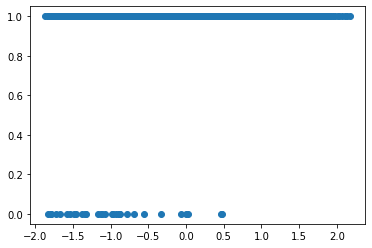

In [15]:
plt.scatter(ldaD, Y)


       Figure 4. LDA scatter plot for the first label('Confirmed')

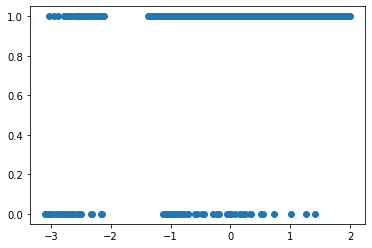

In [16]:
ldaD2= lda.fit(X,Y1).transform(X)
plt.scatter(ldaD2[:,0],Y1)


       Figure 5. LDA scatter plot for the second label('Deaths')

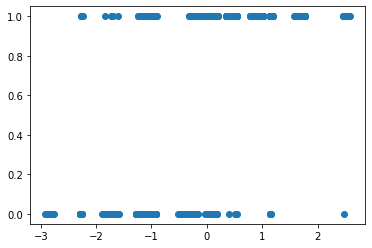

In [17]:
ldaD3= lda.fit(X,Y2).transform(X)
plt.scatter(ldaD3[:,0],Y2)


       Figure 6. LDA scatter plot for the third label('Recovered')

From the results displayed in Figure 4, 5, and 6 for label 1,2,and 3; it can be observed that the numerical features were reduced to only one feature. The scatterplots included graphing the single feature values against the respective target values. The LDA output dataset was eventually not used as the hybrid dataset was not achieved from the output.

## Conclusion:

Both LDA and PCA are linear transformation techniques: LDA is a supervised whereas PCA is unsupervised – PCA ignores class labels(4). Based on our analysis the PCA allowed us to extract a useful dataset that includes the features inclusive of over 80% of the entire dataset. Thus, we chose the PCA dataset as our hybrid dataset for the random forrest and gradient boosting classifiers in CM4 and CM5 respectively. 

## Reference:

(1) https://www.youtube.com/watch?v=Lsue2gEM9D0&ab_channel=StatQuestwithJoshStarmer

(2) https://seaborn.pydata.org/generated/seaborn.scatterplot.html

(3) https://www.youtube.com/watch?v=v6D1M9Aq-54&t=78s&ab_channel=SaptarsiGoswami

(4) https://sebastianraschka.com/faq/docs/lda-vs-pca.html
